In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("telecom_customers.csv")

df.head()

df.isna().any()

Customer ID                          False
Gender                               False
Age                                  False
Married                              False
Number of Dependents                 False
City                                 False
Zip Code                             False
Latitude                             False
Longitude                            False
Number of Referrals                  False
Tenure in Months                     False
Offer                                False
Phone Service                        False
Avg Monthly Long Distance Charges     True
Multiple Lines                        True
Internet Service                     False
Internet Type                         True
Avg Monthly GB Download               True
Online Security                       True
Online Backup                         True
Device Protection Plan                True
Premium Tech Support                  True
Streaming TV                          True
Streaming M

In [2]:
mean_charges=df['Avg Monthly Long Distance Charges'].mean()
mean_downloads=df['Avg Monthly GB Download'].mean()

df['Avg Monthly Long Distance Charges']=df['Avg Monthly Long Distance Charges'].fillna(mean_charges)
df['Avg Monthly GB Download']=df['Avg Monthly GB Download'].fillna(mean_downloads)

In [3]:
df=df.dropna()  #dropping rows with naN for categorical varibles 

In [4]:
df.drop(['Customer ID','Zip Code', 'Latitude', 'Longitude','Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],inplace=True, axis=1)

In [5]:
#x=df.drop('Monthly Charge',axis=1)  # Not required for clustering. But this is how you split columns into x and y
#y=df['Monthly Charge']

In [6]:
num_var=['Age', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download','Monthly Charge']

cat_var=['Gender', 'Married', 'City', 'Offer', 'Phone Service',
        'Multiple Lines',
       'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method']

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct=ColumnTransformer([
    ('num',StandardScaler(),num_var),
    ('cat',OneHotEncoder(),cat_var)
])

df=ct.fit_transform(df)

In [8]:
from sklearn.decomposition import TruncatedSVD  # for sparse matrices (mostly 0 values), PCA is replaced by TruncatedSVD
svd=TruncatedSVD(n_components=2)
svd_values = svd.fit_transform(df)


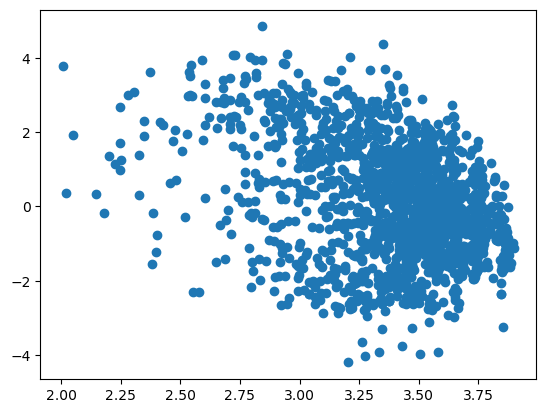

In [9]:
plt.scatter(svd_values[:,0], svd_values[:,1])

C:\Users\ruksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


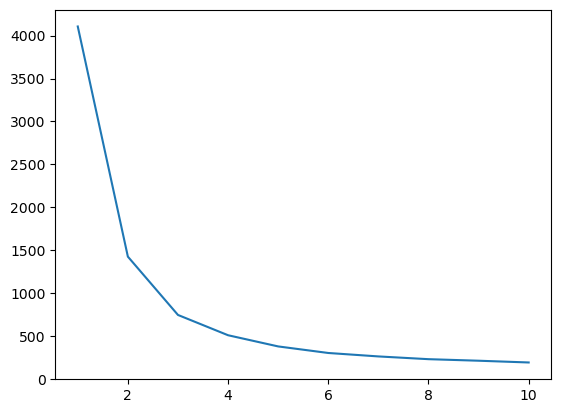

In [10]:
wscc=[]
from sklearn.cluster import KMeans

for i in range(1,11):
    kmeans_test=KMeans(n_clusters=i)
    kmeans_test.fit(svd_values)
    wscc.append(kmeans_test.inertia_)

    
plt.plot(range(1,11),wscc)

In [11]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3)
kmean.fit(svd_values)

cluster=kmean.predict(svd_values)


Text(0.5, 1.0, 'Clustering Customers')

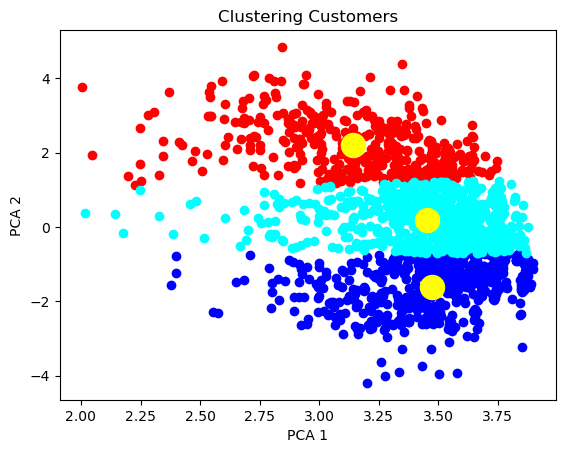

In [12]:
plt.scatter(svd_values[cluster==0,0], svd_values[cluster==0,1], c='red')
plt.scatter(svd_values[cluster==1,0], svd_values[cluster==1,1], c='blue')
plt.scatter(svd_values[cluster==2,0], svd_values[cluster==2,1], c='cyan')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], s=300, c='yellow')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering Customers')
